In [1]:
import numpy as np
import matplotlib.pyplot as pp
from scipy.integrate import solve_ivp

In [10]:
def simple(t,y):
    return -y

sol = solve_ivp(simple, (0,10000), [1], method='RK45', atol=1e-12)

In [11]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 21182
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-01, 1.03166009e+00, ...,
       9.99343830e+03, 9.99711666e+03, 1.00000000e+04])
 t_events: None
        y: array([[1.00000000e+00, 9.04837418e-01, 3.56677002e-01, ...,
        4.53503436e-13, 8.78210435e-13, 3.99699799e-13]])
 y_events: None

(0.0, 100.0)

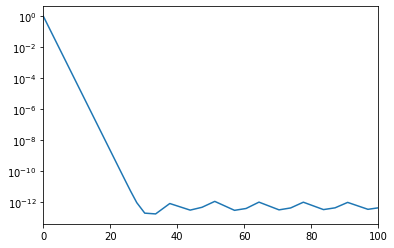

In [12]:
pp.plot(sol.t, sol.y[0])
pp.yscale("log")
pp.xlim([0,100])

In [16]:
def osc(t,y):
    return [y[1], -y[0]]

sol = solve_ivp(osc, (0,10000), [1,0], method='RK45')
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 61994
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 9.99000999e-04, 1.09890110e-02, ...,
       9.99828997e+03, 9.99928268e+03, 1.00000000e+04])
 t_events: None
        y: array([[ 1.00000000e+00,  9.99999501e-01,  9.99939621e-01, ...,
         8.04810298e-02,  7.95965360e-01,  8.77760636e-01],
       [ 0.00000000e+00, -9.99000833e-04, -1.09887898e-02, ...,
         8.97712933e-01,  4.22849169e-01, -2.04623205e-01]])
 y_events: None


(0.0, 100.0)

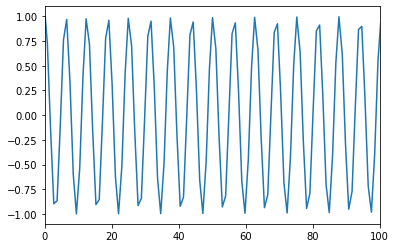

In [18]:
pp.plot(sol.t, sol.y[0])
pp.xlim([0,100])

(0.0, 10000.0)

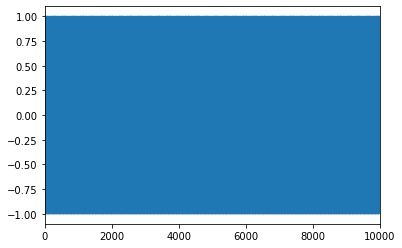

In [26]:
sol1 = solve_ivp(osc, (0,10000), [1,0], method='RK45', t_eval=np.linspace(0,10000,10000))
sol2 = solve_ivp(osc, (0,10000), [1,0], method='RK45', t_eval=np.linspace(0,10000,10000), atol=1e-12, rtol=1e-9)
pp.plot(sol2.t, sol2.y[0])
pp.xlim([0,10000])

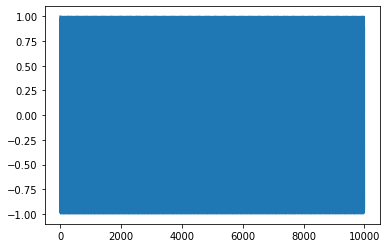

In [28]:
sol3 = solve_ivp(osc, (0,10000), [1,0], method='DOP853', t_eval=np.linspace(0,10000,10000), rtol=1e-6)
pp.plot(sol3.t, sol3.y[0])

In [30]:
def vdp(t,y):
    return [y[1], 10*(1-y[0]**2)*y[1] - y[0] + np.sin(2*np.pi*t/40)]

sol1 = solve_ivp(vdp, [0,10000], [0,1], t_eval=np.linspace(0,10000,10000), method='RK45')
sol2 = solve_ivp(vdp, [0,10000], [0,1], t_eval=np.linspace(0,10000,10000), method='Radau')

(1000.0, 1100.0)

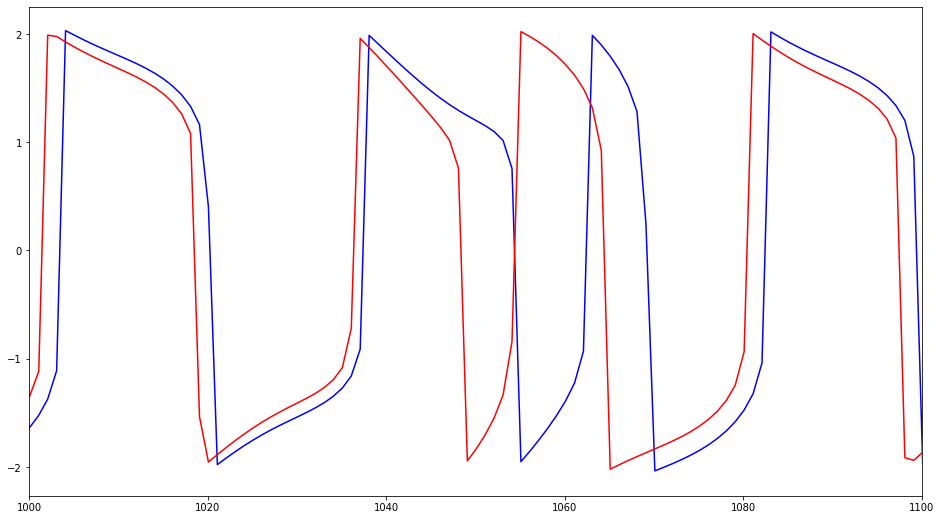

In [35]:
pp.figure(figsize=(16,9))
pp.plot(sol1.t, sol1.y[0], 'b-', sol2.t, sol2.y[0], 'r-')
pp.xlim([1000,1100])

In [40]:
from scipy.fft import fft, fftfreq
p1 = abs(fft(sol1.y[0])**2)
p2 = abs(fft(sol2.y[0])**2)
f1 = fftfreq(len(sol1.y[0]), sol1.t[1] - sol1.t[0])
f2 = fftfreq(len(sol2.y[0]), sol2.t[1] - sol2.t[0])

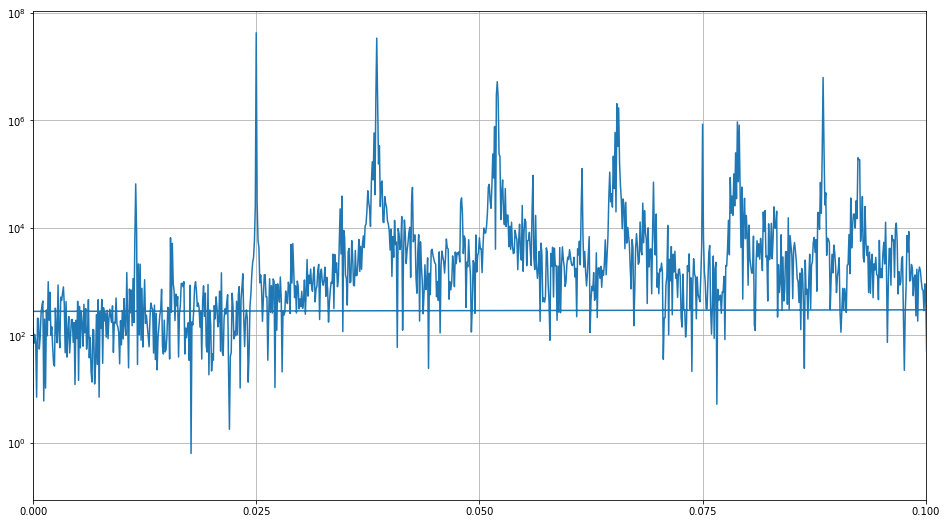

In [47]:
pp.figure(figsize=(16,9))
pp.plot(f1, p1)
pp.xlim([0,0.1])
pp.yscale('log')
pp.xticks(np.arange(5)/40)
pp.grid()

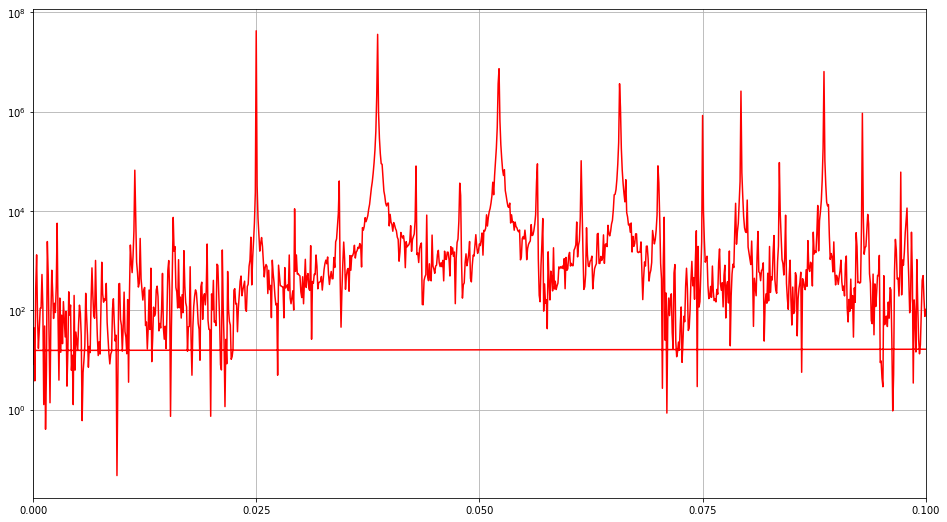

In [48]:
pp.figure(figsize=(16,9))
pp.plot(f2, p2, 'r-')
pp.xlim([0,0.1])
pp.yscale('log')
pp.xticks(np.arange(5)/40)
pp.grid()